# Geographic Coordinates of South East England, England, United Kingdom

South East England is a region in England, United Kingdom at 

Latitude 51°12′00.00″ North, 

Longitude 0°16′12.00″ East.

<div align="center" style="width: 950px; font-size: 80%; text-align: center; margin: 0 auto">
# <img src="https://th.bing.com/th/id/R.ed73d16944c7c2231de8760dbd41d316?rik=WGs2aM1RoCve1w&riu=http%3a%2f%2fwikitravel.org%2fupload%2fshared%2fthumb%2f6%2f64%2fSouth_East_England_map.png%2f600px-South_East_England_map.png&ehk=QVWbCAG7R7Llm7gptlF7xl3YTROhSVg8LQUroXTTbuM%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1"
     alt="Dummy image 1"
     style="float: center; padding-bottom=0.5em"
     width=950px/>

# Install and Import Dependencies 

In [172]:
      !pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
!pip install pygeos==0.13.0
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
# Import necessary modules first
import plotly.express as px
import folium
import matplotlib.pyplot as plt
from shapely import wkt
from pyproj import CRS
import pandas as pd 
import contextily as cx
import pygeos
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point, Polygon
import fiona

# Create a Pandas DataFrame

In [175]:
pd.set_option('display.max_rows', None)
pd.set_option('max_columns', None)

optimized = pd.read_csv('Optimised_rainfall_objects_202209.csv')
print('Optimized data has a datatype of:', type(optimized))
print('Its shape is;',optimized.shape)
optimized.head()

Optimized data has a datatype of: <class 'pandas.core.frame.DataFrame'>
Its shape is; (90, 7)


,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,STATION_AREA_WKT,CREATIONTIME
0,CM53010213-cbd2-4f6d-b3ca-48380c1a9182,50.890245,0.557153,Catchment,CM,"POLYGON ((0.555378 50.88834,0.555892 50.889354...",2022-03-23 18:02:52.000
1,CM145cd21b-3329-4d9f-b44c-14da1a9824a2,51.146506,-0.004037,Catchment,CM,"POLYGON ((-0.010209 51.147913,-0.003574 51.147...",2022-03-23 18:02:52.000
2,CM1f9fd786-9dcd-4a88-9fd7-14ebf61ad0b2,50.794966,-1.023181,Catchment,CM,"POLYGON ((-1.016756 50.792095,-1.017329 50.792...",2022-03-23 18:02:53.000
3,CMae692cd6-fefe-4e1b-8777-25a90d8017fa,51.112963,0.183215,Catchment,CM,"POLYGON ((0.186719 51.11561,0.18656 51.115525,...",2022-03-23 18:02:54.000
4,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,51.336560,1.369312,Catchment,CM,"POLYGON ((1.381381 51.333004,1.38128 51.333037...",2022-03-23 18:02:54.000


## Optimized Rainfall Data

In [176]:
optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATION_NO             90 non-null     object 
 1   STATION_LATITUDE       90 non-null     float64
 2   STATION_LONGITUDE      90 non-null     float64
 3   OBJECT_TYPE            90 non-null     object 
 4   OBJECT_TYPE_SHORTNAME  90 non-null     object 
 5   STATION_AREA_WKT       90 non-null     object 
 6   CREATIONTIME           90 non-null     object 
dtypes: float64(2), object(5)
memory usage: 5.0+ KB


## Non-optimized Rainfall Data

In [177]:
non_optimized = pd.read_csv('Non-optimised_rainfall_objects_202209.csv')
print('Non-ptimized data has a datatype of:', type(non_optimized))
print('Its shape is;',non_optimized.shape)

non_optimized.head()

Non-ptimized data has a datatype of: <class 'pandas.core.frame.DataFrame'>
Its shape is; (597, 7)


,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,STATION_AREA_WKT,CREATIONTIME
0,HSadee6548-d797-49a3-a2a0-b7e8348f0b27,51.130919,1.317469,Hotspot,HS,NaN,2019-05-23 10:22:57.000
1,HSfd30138a-5a83-450a-81d3-7d1335d69c09,50.846194,-1.055814,Hotspot,HS,NaN,2019-05-20 11:42:16.000
2,HSefb5e85c-71f8-42a4-b529-44cdd306486d,50.839552,-1.044914,Hotspot,HS,NaN,2019-05-20 12:12:35.000
3,HS9037443f-c430-4468-86b8-8c2c0362e1c6,51.416060,0.752698,Hotspot,HS,NaN,2019-05-23 14:28:36.000
4,HS27e9d11e-c6ce-4e8f-ba3a-aac71fd09ff3,50.824115,-0.426342,Hotspot,HS,NaN,2018-04-10 12:31:01.000


In [178]:
non_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATION_NO             597 non-null    object 
 1   STATION_LATITUDE       597 non-null    float64
 2   STATION_LONGITUDE      597 non-null    float64
 3   OBJECT_TYPE            597 non-null    object 
 4   OBJECT_TYPE_SHORTNAME  597 non-null    object 
 5   STATION_AREA_WKT       56 non-null     object 
 6   CREATIONTIME           597 non-null    object 
dtypes: float64(2), object(5)
memory usage: 32.8+ KB


In [179]:
non_optimized.isna().sum()

STATION_NO                 0
STATION_LATITUDE           0
STATION_LONGITUDE          0
OBJECT_TYPE                0
OBJECT_TYPE_SHORTNAME      0
STATION_AREA_WKT         541
CREATIONTIME               0
dtype: int64

In [180]:
non_optimized['OBJECT_TYPE'].value_counts()

Hotspot             541
Catchment            49
Zone of interest      7
Name: OBJECT_TYPE, dtype: int64

## The Geographic positions of Object-types using Pandas plotly

In [181]:
fig = px.scatter_mapbox(
    optimized,
    lat="STATION_LATITUDE",
    lon="STATION_LONGITUDE",
    color="OBJECT_TYPE",
    mapbox_style="carto-positron",
    labels={"OBJECT_TYPE": "OBJECT TYPE"},
    title="Distribution of Optimized Object Types",
)
fig.show()

fig = px.scatter_mapbox(
    non_optimized,
    lat="STATION_LATITUDE",
    lon="STATION_LONGITUDE",
    color="OBJECT_TYPE",
    mapbox_style="carto-positron",
    labels={"OBJECT_TYPE": "OBJECT TYPE"},
    title="Distribution of Non-Optimized Object-Types",
)
fig.show()

## Insight

The data are in two forms: one is Optimized and the other is Non-optimized. Both are in csv files.

The Optimized data (supposedly, the clean data) has the following:

*   It is made up of 90 rows (stations) and 7 columns (features of a station).

*   The values of the data in this dataset are all 'non-null'. Meaning there are no null, empty or missing values therein. 

*   Of the 7 columns, 5 are of 'object' data-type and 2 are of 'float' data-type.

*   The 'OBJECT_TYPE' column has only catchment



The same can not be said about the the Non-optimized data. 

*   This dataset has a total of 597 stations and 7 columns. 

*   There are null values, up to 541 rows, in the 'STATION-AREA-WKT' column.

*   The data-types are 5 objects and 2 floats.

*   The 'OBJECT_TYPE' column has 541 Hotspots (the null values in the 'STATION-AREA-WKT' column), 49 Catchments and 7 Zones of interest

Peculiar to both datasets:

*   The dataframes are: datatype of: <class 'pandas.core.frame.DataFrame'>

*   They lack the geometry column that makes for a GeoPandas GeoDataFrame.

*   The columns give information about each station, which include, STATION_NO, STATION_LATITUDE, STATION_LONGITUDE, OBJECT_TYPE, OBJECT_TYPE_SHORTNAME, STATION_AREA_WKT and CREATIONTIME.

*WKT* stands for Well Known Text.

The plots above shows the geographical references of these object types in the Optimized and Non-optimized datasets. Obviously the plot with multiple colours represents the Non-optimized data.







# The Instruction

The present data DOES NOT include any actual rainfall data.

*   Identify which object to retrieve data for the project

The 5-step instruction gives the procedures to arrive at the stations for which data will be released for the project.



## 1. Create Hotspot Dataframe from Non-optimized

*   use only 'hotspot' (indicated in OBJECT_TYPE:) from the Non_optimized_rainfall_object_20229.csv

First, create Dataframes from Non-optimized rainfall data.

### Zone-of-Interest Dataframe

In [182]:
zone_of_interest = non_optimized[
    non_optimized.loc[
        :, 'OBJECT_TYPE'
        ]
        =='Zone of interest'
        ]

### Catchment Dataframe

In [183]:
n_catchment = non_optimized[
    non_optimized.loc[
        :,'OBJECT_TYPE'
        ]
         == 'Catchment'
        ]

### Hotspot Dataframe

In [184]:
#Filter the datafram to contain only hotspot object type
hotspot_df = non_optimized[
    non_optimized.loc[
        :, 'OBJECT_TYPE'
        ]
        =='Hotspot'
        ]

#Drop WKT column
hotspot_df = hotspot_df.drop(
    'STATION_AREA_WKT', axis=1
    )

## 2. Create the geometry columns in the dataframes

*   for the object in step 1, get the geometry from the column STATION_AREA_WKT. This geometry should only consist of a pair of coordinates

In [185]:
n_catchment['geometry'] = n_catchment.STATION_AREA_WKT.apply(wkt.loads)
#Drop WKT column
n_catchment.drop(
    'STATION_AREA_WKT', axis=1, inplace=True
    ) 

# Geopandas GeoDataFrame
n_catchment = gpd.GeoDataFrame(
    n_catchment, geometry='geometry'
    )

# create a csv file called 'n_catchment_csv'
#n_catchment.to_csv('n_catchment_csv.csv', index=True)

print(
    'The size of n_catchment dataframe is', n_catchment.shape
    )


zone_of_interest['geometry'] = zone_of_interest.STATION_AREA_WKT.apply(wkt.loads)
#Drop WKT column
zone_of_interest.drop(
    'STATION_AREA_WKT', axis=1, inplace=True
    ) 
# Geopandas GeoDataFrame
zone_of_interest = gpd.GeoDataFrame(
    zone_of_interest, geometry='geometry'
    )
# create a csv file called 'zone_of_interest_csv'
#zone_of_interest.to_csv('zone_of_interest_csv.csv', index=True)

print(
    'The size of zone_of_interest dataframe is', zone_of_interest.shape
    )


The size of n_catchment dataframe is (49, 7)
The size of zone_of_interest dataframe is (7, 7)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [186]:
# obtain the geometries for Hotspots
hotspot_gdf = gpd.GeoDataFrame(
    hotspot_df, geometry = gpd.points_from_xy(
        hotspot_df['STATION_LONGITUDE'],hotspot_df['STATION_LATITUDE']
    )
)

# create a csv file called 'hotspot_df_csv'
#hotspot_df.to_csv('hotspot_df_csv.csv', index=True)


print('Datatype is;', type(hotspot_gdf))
print('Shape is:', hotspot_gdf.shape)
print(hotspot_gdf.crs)
hotspot_gdf.head()

Datatype is; <class 'geopandas.geodataframe.GeoDataFrame'>
Shape is: (541, 7)
None


,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,CREATIONTIME,geometry
0,HSadee6548-d797-49a3-a2a0-b7e8348f0b27,51.130919,1.317469,Hotspot,HS,2019-05-23 10:22:57.000,POINT (1.31747 51.13092)
1,HSfd30138a-5a83-450a-81d3-7d1335d69c09,50.846194,-1.055814,Hotspot,HS,2019-05-20 11:42:16.000,POINT (-1.05581 50.84619)
2,HSefb5e85c-71f8-42a4-b529-44cdd306486d,50.839552,-1.044914,Hotspot,HS,2019-05-20 12:12:35.000,POINT (-1.04491 50.83955)
3,HS9037443f-c430-4468-86b8-8c2c0362e1c6,51.416060,0.752698,Hotspot,HS,2019-05-23 14:28:36.000,POINT (0.75270 51.41606)
4,HS27e9d11e-c6ce-4e8f-ba3a-aac71fd09ff3,50.824115,-0.426342,Hotspot,HS,2018-04-10 12:31:01.000,POINT (-0.42634 50.82411)


In [187]:
hotspot_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 541 entries, 0 to 595
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   STATION_NO             541 non-null    object  
 1   STATION_LATITUDE       541 non-null    float64 
 2   STATION_LONGITUDE      541 non-null    float64 
 3   OBJECT_TYPE            541 non-null    object  
 4   OBJECT_TYPE_SHORTNAME  541 non-null    object  
 5   CREATIONTIME           541 non-null    object  
 6   geometry               541 non-null    geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 33.8+ KB


In [188]:
n_catchment.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 49 entries, 13 to 596
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   STATION_NO             49 non-null     object  
 1   STATION_LATITUDE       49 non-null     float64 
 2   STATION_LONGITUDE      49 non-null     float64 
 3   OBJECT_TYPE            49 non-null     object  
 4   OBJECT_TYPE_SHORTNAME  49 non-null     object  
 5   CREATIONTIME           49 non-null     object  
 6   geometry               49 non-null     geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 3.1+ KB


In [189]:
zone_of_interest.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7 entries, 15 to 566
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   STATION_NO             7 non-null      object  
 1   STATION_LATITUDE       7 non-null      float64 
 2   STATION_LONGITUDE      7 non-null      float64 
 3   OBJECT_TYPE            7 non-null      object  
 4   OBJECT_TYPE_SHORTNAME  7 non-null      object  
 5   CREATIONTIME           7 non-null      object  
 6   geometry               7 non-null      geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 448.0+ bytes


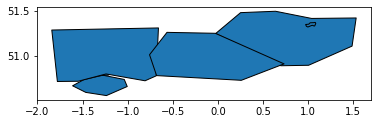

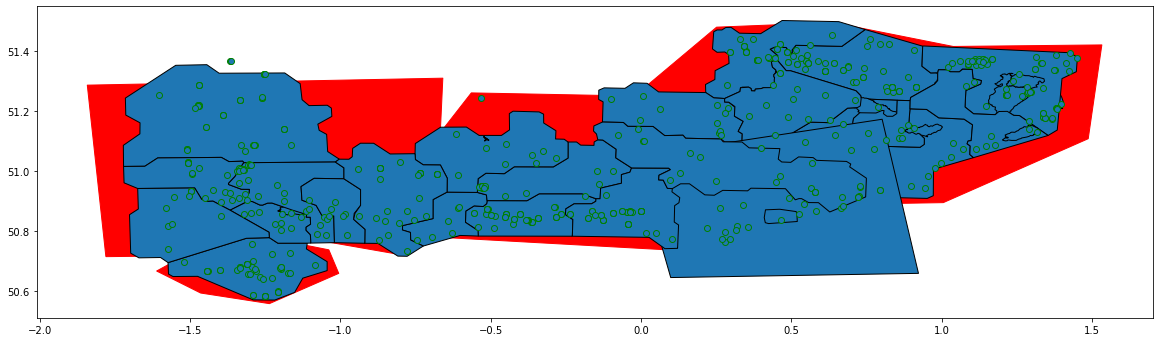

In [190]:
# plot the zone of interest for clear visualization
zone_of_interest.plot(edgecolor = 'black') 

#plotting multi layers of hotspot, n_catchment and zone_of_interest dataframes 
fig,ax = plt.subplots(figsize=(20, 14), edgecolor='k')
#world.plot(ax=ax, color='white', edgecolor='black')
zone_of_interest.plot(ax=ax, cmap='hsv', edgecolor='red', column='OBJECT_TYPE')
n_catchment.plot(ax=ax, edgecolor = 'black')
hotspot_gdf.plot(ax=ax, edgecolor = 'green')

### Insight


*   The Non-optimized rainfall data has been broken into zone_of_interest, n_catchment and hotspot dataframes. 

*   A geometry column was created in each of them with their 'STATION_AREA_WKT' and pairs of longitudes and latitudes, to qualify them for GeoPandas GeoDataFrames. The info() function shows these created columns.


*   The station-area-wkt columns were removed.

*   GeoPandas GeoDataFrame for the Hotspot is now called 'hotspot_gdf'.  

In the plot above, the zones of interest are defined by the red-edged colour. The catchments are defined by the black-edged colour.The hotspots are the green-edged spots.

A group of Hotspots can be found in a Catchment and group of Catchments in a Zone of interest.

*   The little plot at the top gives the full visual of the zone of interest.




## 3. Create geometry column in the optimized data

*   get the reference geometry values from the STATION_AREA_WKT in optimized_rainfall_object_20229.csv.This geometry will be a polygon and have many points.

In [191]:
optimized['geometry'] = optimized.STATION_AREA_WKT.apply(wkt.loads)
optimized.drop('STATION_AREA_WKT', axis=1, inplace=True) #Drop WKT column

# Geopandas GeoDataFrame
optimized_gdf = gpd.GeoDataFrame(optimized, geometry='geometry')
print('Datatype is;', type(optimized_gdf))
print('Shape is:', optimized_gdf.shape)
print(optimized_gdf.crs)
optimized_gdf.head()

Datatype is; <class 'geopandas.geodataframe.GeoDataFrame'>
Shape is: (90, 7)
None


,STATION_NO,STATION_LATITUDE,STATION_LONGITUDE,OBJECT_TYPE,OBJECT_TYPE_SHORTNAME,CREATIONTIME,geometry
0,CM53010213-cbd2-4f6d-b3ca-48380c1a9182,50.890245,0.557153,Catchment,CM,2022-03-23 18:02:52.000,"POLYGON ((0.55538 50.88834, 0.55589 50.88935, ..."
1,CM145cd21b-3329-4d9f-b44c-14da1a9824a2,51.146506,-0.004037,Catchment,CM,2022-03-23 18:02:52.000,"POLYGON ((-0.01021 51.14791, -0.00357 51.14734..."
2,CM1f9fd786-9dcd-4a88-9fd7-14ebf61ad0b2,50.794966,-1.023181,Catchment,CM,2022-03-23 18:02:53.000,"POLYGON ((-1.01676 50.79210, -1.01733 50.79221..."
3,CMae692cd6-fefe-4e1b-8777-25a90d8017fa,51.112963,0.183215,Catchment,CM,2022-03-23 18:02:54.000,"POLYGON ((0.18672 51.11561, 0.18656 51.11552, ..."
4,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,51.336560,1.369312,Catchment,CM,2022-03-23 18:02:54.000,"POLYGON ((1.38138 51.33300, 1.38128 51.33304, ..."


In [192]:
optimized_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   STATION_NO             90 non-null     object  
 1   STATION_LATITUDE       90 non-null     float64 
 2   STATION_LONGITUDE      90 non-null     float64 
 3   OBJECT_TYPE            90 non-null     object  
 4   OBJECT_TYPE_SHORTNAME  90 non-null     object  
 5   CREATIONTIME           90 non-null     object  
 6   geometry               90 non-null     geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 5.0+ KB


The station-area-wkt column in the Optiimized dataframe consisted of inactive geometries (POLYGONS). 

*   This has been converted to an active geometry column, and the latter has been removed from the dataframe. 

*   The dataframe became a GeoPandas GeoDataFrame, called optimized_gdf, as a result. This can be seen as shown by the info() function.

### Convert the GeoPandas GeoDataFrame to an ESRI Shapefile




In [193]:
#save the file as an ESRI shapefile
hotspot_gdf.crs = "EPSG:4326"
optimized_gdf.crs = "EPSG:4326"

optimized_gdf.to_file(filename = 'optimized_gdf.shp', driver = 'ESRI Shapefile')
hotspot_gdf.to_file(filename = 'hotspot_gdf.shp', driver = 'ESRI Shapefile')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



### Read ESRI *Shapefiles* into GeoPandas GeoDataFrame

In [194]:
# Reload the data in shp (ESRI shapefile) format
optimized_shp = gpd.read_file(r'optimized_gdf.shp')
hotspot_shp = gpd.read_file(r'hotspot_gdf.shp')

# drop unnecessary columns
optimized_shp = optimized_shp.drop(['OBJECT_T_1',	'CREATIONTI'], axis = 1)
hotspot_shp = hotspot_shp.drop(['OBJECT_T_1',	'CREATIONTI'], axis = 1)

# Set the station number column as the index
optimized_shp = optimized_shp.set_index("STATION_NO")
hotspot_shp = hotspot_shp.set_index("STATION_NO")


In [195]:
print(hotspot_shp.crs)
print(hotspot_shp.shape)
hotspot_shp.head()

epsg:4326
(541, 4)


,STATION_LA,STATION_LO,OBJECT_TYP,geometry
STATION_NO,,,,
HSadee6548-d797-49a3-a2a0-b7e8348f0b27,51.130919,1.317469,Hotspot,POINT (1.31747 51.13092)
HSfd30138a-5a83-450a-81d3-7d1335d69c09,50.846194,-1.055814,Hotspot,POINT (-1.05581 50.84619)
HSefb5e85c-71f8-42a4-b529-44cdd306486d,50.839552,-1.044914,Hotspot,POINT (-1.04491 50.83955)
HS9037443f-c430-4468-86b8-8c2c0362e1c6,51.416060,0.752698,Hotspot,POINT (0.75270 51.41606)
HS27e9d11e-c6ce-4e8f-ba3a-aac71fd09ff3,50.824115,-0.426342,Hotspot,POINT (-0.42634 50.82411)


In [196]:
print(optimized_shp.crs)
print(optimized_shp.shape)
optimized_shp.head()

epsg:4326
(90, 4)


,STATION_LA,STATION_LO,OBJECT_TYP,geometry
STATION_NO,,,,
CM53010213-cbd2-4f6d-b3ca-48380c1a9182,50.890245,0.557153,Catchment,"POLYGON ((0.55538 50.88834, 0.55589 50.88935, ..."
CM145cd21b-3329-4d9f-b44c-14da1a9824a2,51.146506,-0.004037,Catchment,"POLYGON ((-0.01021 51.14791, -0.00357 51.14734..."
CM1f9fd786-9dcd-4a88-9fd7-14ebf61ad0b2,50.794966,-1.023181,Catchment,"POLYGON ((-1.01676 50.79210, -1.01676 50.79208..."
CMae692cd6-fefe-4e1b-8777-25a90d8017fa,51.112963,0.183215,Catchment,"POLYGON ((0.18672 51.11561, 0.18656 51.11552, ..."
CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,51.336560,1.369312,Catchment,"POLYGON ((1.38138 51.33300, 1.37961 51.33247, ..."


## 4. Determine which points (Hotspots) fall within the polygons

*   determine which point from step 2 fall within the polygon from step 3, the geopandas can be useful here

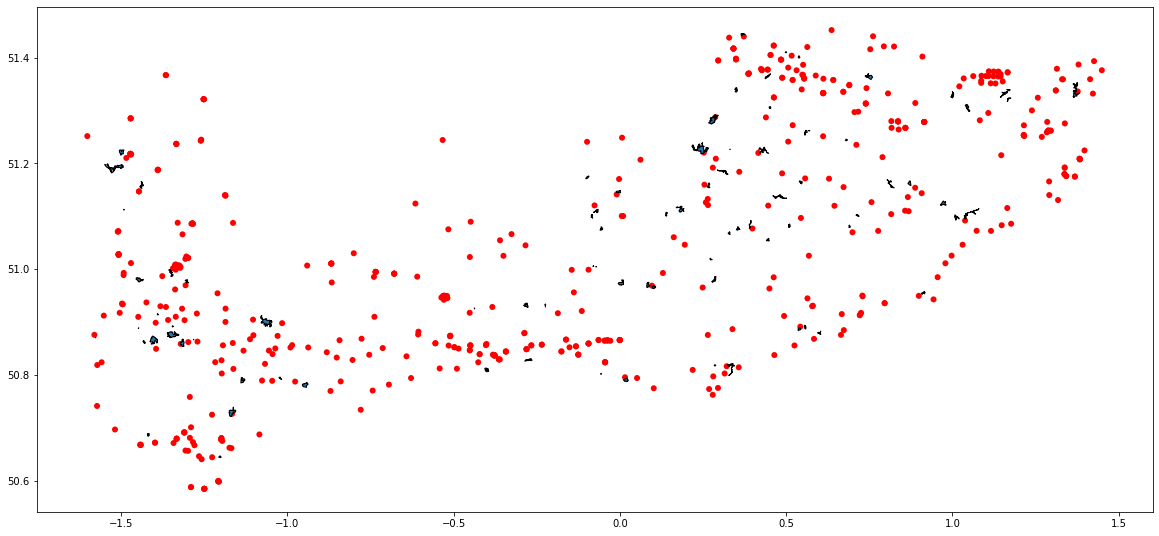

In [197]:
#plotting multi layers of optimized and hotspot 
fig,ax = plt.subplots(figsize=(20, 14), edgecolor='k')
hotspot_shp.plot(ax=ax, cmap='hsv', edgecolor='none', column='OBJECT_TYP')
optimized_shp.plot(ax=ax, edgecolor = 'black')
#map = folium.Map(location = [50.824115,-0.426342	], tiles='OpenStreetMap' , zoom_start = 9)



The POINTS from the 'hotspot_gdf' that fall within the POLYGONS from the 'optimized_gdf' can be recognised in the plot above as those points where the red points (representing hotspots) intersect the black polygons (representing catchments).

## 5. Points (Hotspots) located inside the polygons (Catchments)

*   send me a list of STATION_NO Ids for all the sites identified in step 4.

The following pairs of coordinates were hand-picked from exploring the data on kepler.gl

1.   HSf1853941-a029-4cd2-bf85-6337b3a3446e- POINT (-1.321106 50.858857)

2.   HSfcaf96e2-db37-427a-bde4-c2d407153429- POINT (-1.166267 50.726717)

3.   HS0a4a592c-dbb3-4f11-a1d6-68920a910e92- POINT (0.286555 51.287484)

4.   HS0446ab5b-5462-44c9-a216-b0a0850191d3- POINT (0.252288 51.2206).

However, the code snippet below shows the distances between the POINTS and POLYGONS. Fair enough, the first four are the same points that were hand-picked.

The 'STATION_NO' with to zero-distances are the POINTS (pairs of coordinated) located within (intersecting) the POLYGONS.




In [198]:
# the stations inside the polygon have zero distances
hotspot_intersect_optimized = gpd.sjoin(hotspot_shp, optimized_shp)
print(hotspot_intersect_optimized.shape)
hotspot_intersect_optimized

(3, 8)


,STATION_LA_left,STATION_LO_left,OBJECT_TYP_left,geometry,index_right,STATION_LA_right,STATION_LO_right,OBJECT_TYP_right
STATION_NO,,,,,,,,
HSf1853941-a029-4cd2-bf85-6337b3a3446e,50.858857,-1.321106,Hotspot,POINT (-1.32111 50.85886),CM2dc2b371-a0b5-4309-9a75-2a0e6d1e65ea,50.860208,-1.315635,Catchment
HS0a4a592c-dbb3-4f11-a1d6-68920a910e92,51.287484,0.286555,Hotspot,POINT (0.28656 51.28748),CM11dfcd06-63ed-461a-8b29-9f9690a585c6,51.282425,0.279488,Catchment
HS0446ab5b-5462-44c9-a216-b0a0850191d3,51.220600,0.252288,Hotspot,POINT (0.25229 51.22060),CM347c6d5d-2c35-4a5c-a498-e173661b37dd,51.227190,0.243767,Catchment


### Hotspots Closest to Catchments

In [199]:
# get the nearest catchment to a hotspot by applying geopandas 'sjoin_nearest' function
# the stations inside the polygon have zero distances
hotspot_catchment_closest = gpd.sjoin_nearest(hotspot_shp, optimized_shp, distance_col='distances')
print(hotspot_catchment_closest.shape)
hotspot_catchment_closest[['index_right', 'distances']].head()

(541, 9)


/usr/local/lib/python3.7/dist-packages/geopandas/array.py:348: UserWarning:

Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,index_right,distances
STATION_NO,,
HSadee6548-d797-49a3-a2a0-b7e8348f0b27,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,0.199708
HS38a3bb31-4dbd-4bf4-9f61-7cec9ce3e29e,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,0.098130
HSeee87958-1c02-4935-a29b-fde86e13390c,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,0.100468
HSe615616e-f13e-47d0-8a1c-636c3896b248,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,0.103860
HS88d7c273-c678-49a8-b0d0-9031f21ae4fa,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,0.098130


### Insight

*   Only three Hotspots are found inside the Catchments (as shown by the sjoin funcion).

The sjoin_nearest  shows the distance of each Hotspot from the nearest Catchment.

*   Some Catchment have multiple Hotspots attached to them

*   Others have single Hotspot attached.

There are only 77 unique Catchments as opposed the 90 in the Optimized data -- why?



In [200]:
#selected_10_sites.to_csv('selected_10_sites.csv', index=True)

# **Coordinate reference systems** (CRS)
These are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth. CRS provides information that assigns Cartesian x and y map coordinates to physical locations

A map projection (or a projected coordinate system) is a systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters (instead of decimal degrees).

*Buffer* is a GeoPandas helper function that expands a point to a circle-like polygon. Buffer is used on a geodataframe series (column) to create a polygon around a line or point.

In [201]:
# Reprojecting the into a projected crs (coordinate reference system)
optimized_projected = optimized_shp['geometry'].to_crs(epsg=32629)

# create a projected crs for the hotspot and optimized (convert to meter)
hotspot_shp['projpoint'] = hotspot_shp['geometry'].to_crs(epsg=32629)
optimized_shp['projpoly'] = optimized_projected

# create the centroid, area and boundary features in the optimized Geopandas Geodataframe
optimized_shp['area'] = optimized_projected.area

# use a buffer for projected crs for the optimized (expand the polygons' circumfereces)
optimized_shp['buffer_projpoly'] = optimized_projected.buffer(distance=1000)


In [202]:
# area of the polygon in a projected crs
print('Area of largest polygon in meters sq =',optimized_shp['area'].max())
print('Area of smallest polygon in meters sq =',optimized_shp['area'].min())
print('Average area of polygon in meters sq =',optimized_shp['area'].mean())

Area of largest polygon in meters sq = 2190966.790407718
Area of smallest polygon in meters sq = 3416.476346660458
Average area of polygon in meters sq = 302188.6226968252


## Let's see the difference in the 3 plots- degree units, meter units and projected buffer

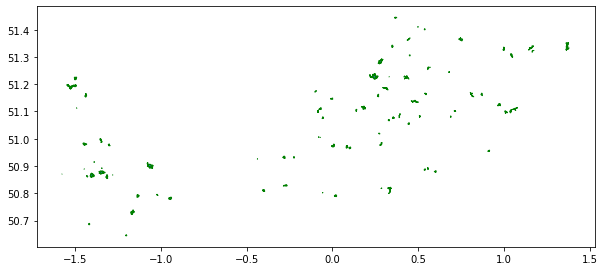

In [203]:
# Data points in decimal degree units
optimized_shp.plot(edgecolor='green', figsize= (10,7))

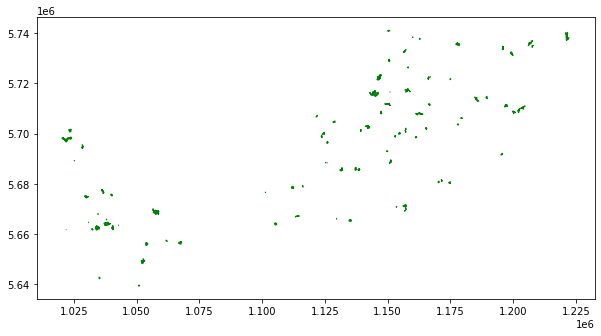

In [204]:
# Data points in projected coordinate system (meter units)
optimized_shp['projpoly'].plot(edgecolor='green', figsize= (10,7))

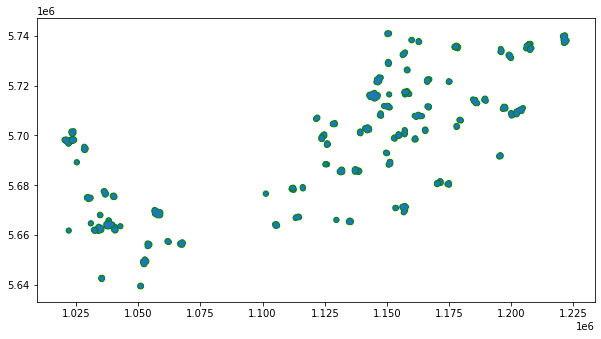

In [205]:
# Data points with the buffer (distance of 500m around the point)
optimized_shp['buffer_projpoly'].plot(edgecolor='green', figsize=(10, 7))

### Insight

The first plot is in degree unit, the second is a projected crs in meter unit. There are no much differences except that the units of measurement changed on the axes.

There is an obvious difference in the projected buffered plot, unlike those units in degree and meter, the size of the polygons have been enlarged because of the buffer.

*   going with the projected buffered, more hotspots will be included in the  catchments. 



## Try Reprojection With Buffer on Optimized data

Units are in meter and polygon are expanded (buffered) to accommodate more hotspots.

First, change the active geometry columns of both hotspot and optimized dataframes.




In [206]:
# change the active columns of both dataframes
optimized_mq = optimized_shp.set_geometry("buffer_projpoly")
hotspot_mq = hotspot_shp.set_geometry("projpoint")

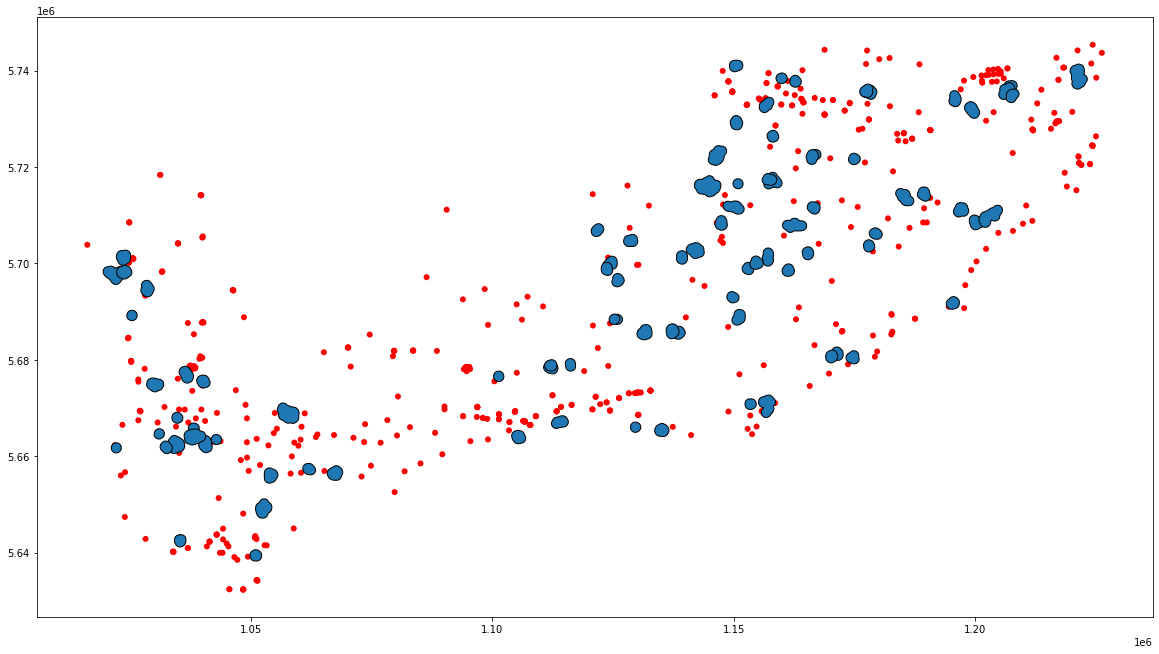

In [207]:
# multi layer plot of projections 
fig,ax = plt.subplots(figsize=(20, 14), edgecolor='k')
#world.plot(ax=ax, color='white', edgecolor='black')
hotspot_mq.plot(ax=ax, cmap='hsv', edgecolor='none', column='OBJECT_TYP')
optimized_mq.plot(ax=ax, edgecolor = 'black')

In [208]:
# get the nearest polygon to a point by applying geopandas 'sjoin_nearest' function
# the stations inside the polygons have zero distances
projected_intersect = gpd.sjoin_nearest(hotspot_mq, optimized_mq, distance_col="distances_mq").sort_values('index_right')

# get hotspots within polygons (those with zero distances only)
projected_intersect = projected_intersect[projected_intersect['distances_mq'] == 0]

# reverse the active columns of both dataframes
optimized_mq = optimized_shp.set_geometry("geometry")
hotspot_mq = hotspot_shp.set_geometry("geometry")

print(projected_intersect.shape)
projected_intersect[['index_right', 'distances_mq']].head()

(31, 13)


,index_right,distances_mq
STATION_NO,,
HS0a4a592c-dbb3-4f11-a1d6-68920a910e92,CM11dfcd06-63ed-461a-8b29-9f9690a585c6,0.0
HS0393383c-6104-466b-8c29-f37979b8f3a7,CM145cd21b-3329-4d9f-b44c-14da1a9824a2,0.0
HS763fccd6-bf96-4e98-b033-94f4d07645ba,CM14ca1962-ab20-4212-bd5a-6418a21c7a5c,0.0
HSb4de0330-eadc-4456-8bd1-a6c5efb56bc5,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,0.0
HS2bb66812-e229-4e75-9b6b-c52052917ab3,CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,0.0


### Insight

*   With a buffer of 1000 meters, 31 hotspots intersect the catchments.

*   Equally, catchments close to each other intersect

Buffer can be increased to accommodate more Hotspots. Well, it is worth noting that there are only 90 Catchments which are not evenly spread across.

*   While there are areas with clusters of Catchments

*   There are areas without Catchments, just Hotspots.



## Function to return the top two closest Hotspots to a Catchment
First, change the index of the hotspot_catchment_closest dataframe. This is necessary for the function to iterate through the station_no as iteration cannot be carried out on an index.

In [209]:
# change the index of the hotspot_catchment_closest dataframe
hotspot_catchment_closest.reset_index(inplace=True)

In [210]:
def closest_station(df):
    ''' Function to return the two closest stations to a catchment (right index)
        input:   df -> (dataframe) containing columns STATION_NO, index_right and distances
        Output:  returns a dictionary containing index_right as keys and the two closest distances as a list of values
    '''
    
    closests = {}
    
    for index_right in df.index_right.unique():
        df_stations = df[df.index_right == index_right]
        df_stations = df_stations.sort_values(by='distances')
        closests.update({
            index_right : list(df_stations[0:2].STATION_NO)
        })
    return closests

In [211]:
# convert the  dictionary to a dataframe with Catchments and Hotspots
needed_station_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in closest_station(hotspot_catchment_closest).items() ])).T
print('Total hotspots in each column are:\n', needed_station_df.nunique())
needed_station_df.head()

Total hotspots in each column are:
 0    77
1    64
dtype: int64


,0,1
CM17f5cc28-e241-4bef-9afb-4b1fdbe2deba,HSb4de0330-eadc-4456-8bd1-a6c5efb56bc5,HS2bb66812-e229-4e75-9b6b-c52052917ab3
CM57693ab0-be34-41e4-bf57-c3199620d806,HS7cd704d1-de5d-4b36-8bf5-4fbd51eff3a4,HS7f6db68b-c71c-48b3-985f-45d66eab5fe7
CM1f9fd786-9dcd-4a88-9fd7-14ebf61ad0b2,HSf9b5c367-8485-4b68-9dce-6e47a9734ff2,HSefb5e85c-71f8-42a4-b529-44cdd306486d
CM65a85182-181e-4782-91a5-fcd4e5b94f98,HS9037443f-c430-4468-86b8-8c2c0362e1c6,HS025c8bd9-20c6-4615-a418-71cdaaa214cd
CMe0b8ad68-347c-40af-bdee-dfdac97b3df4,HS27e9d11e-c6ce-4e8f-ba3a-aac71fd09ff3,HSf32255da-24c9-497b-ba2e-e5581f0f0cdd


### Insight
The function, closest_station(), iterates through those Hotspots located near the Catchments and pulls out the two closest.

*   64 Catchments have two or more Hostspots closest to them, from these 128 Hotspots are pulled

*   13 Catchments have single Hotspots closest to them and 13 Hotspots are pulled from them

*   141 total Hotspots are pulled from 77 Catchments.

*   13 NaN are found in column 1.This because only one Hotspot is close to each of these Catchments.

The function can be tweaked to increase the number of Hospots pulled from a Catchment.

The sjoin_nearest geopandas function displays the distances between a Catchment and its nearest Hotspots.

The nearest Hotspots to each Catchment range from 1 to 36. This becomes obvious when you run the code snippet 'hotspot_catchment_closest['index_right'].value_counts()'. 

In [212]:
#needed_station_df.to_csv('needed_station_csv.csv', index=True)